# Movie Classificaton Dataset - Allie Baker & Nikola Mrdak

In [1]:
#Installed Libraries and Reading the Data File
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('movie_classification.csv')

## Information of Each Column 
### The Movies Classification Dataset Contains 19 Columns:
-Marketing expense (float64): Amount spent on marketing for the movie in monetary units.

-Production expense (float64): Total cost of movie production in monetary units.

-Multiplex coverage (float64): Proportion of multiplexes showing the movie, represented as a decimal.

-Budget (float64): Overall budget allocated for the movie in monetary units.

-Movie_length (float64): Length of the movie in minutes.

-Lead_ Actor_Rating (float64): Rating of the lead actor on a numerical scale.

-Lead_Actress_rating (float64): Rating of the lead actress on a numerical scale.

-Director_rating (float64): Rating of the director on a numerical scale.

-Producer_rating (float64): Rating of the producer on a numerical scale.

-Critic_rating (float64): Rating from critics on a numerical scale.

-Trailer_views (int64): Number of views the movie's trailer received.

-3D_available (object): Indicates whether the movie is available in 3D (values: "YES" or "NO").

-Time_taken (float64): Total time spent on the movie's production in days.

-Twitter_hastags (float64): Number of Twitter hashtags related to the movie.

-Genre (object): Genre category of the movie (e.g., Thriller, Drama, Comedy).

-Avg_age_actors (int64): Average age of the main actors in the movie.

-Num_multiplex (int64): Number of multiplex theaters screening the movie.

-Collection (int64): Total collection or revenue generated by the movie in monetary units.

-Start_Tech_Oscar (int64): Binary indicator of whether the movie won an Oscar (1 = Yes, 0 = No).

### Analysis of Dataset

In [3]:
#Viewing the first three rows of the data
data.head(3)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1


In [4]:
#Describing the numerical columns
data.describe()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,494.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.391498,260.832095,39.181818,545.043478,45057.707510,0.545455
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,31.295161,104.779133,12.513697,106.332889,18364.351764,0.498422
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,10000.000000,0.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.300000,223.796000,28.000000,465.000000,34050.000000,0.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,160.000000,254.400000,39.000000,535.500000,42400.000000,1.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.890000,283.416000,50.000000,614.750000,50000.000000,1.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,100000.000000,1.000000


In [5]:
#Finding datatypes and how many entries of each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [6]:
#Measuring the size of the data
data.shape
print(f'This dataset is {data.shape[0]} rows by {data.shape[1]} columns.')

This dataset is 506 rows by 19 columns.


In [7]:
#Checking for null values
data.isna().sum().sort_values(ascending=False)

Time_taken             12
Marketing expense       0
Trailer_views           0
Collection              0
Num_multiplex           0
Avg_age_actors          0
Genre                   0
Twitter_hastags         0
3D_available            0
Critic_rating           0
Production expense      0
Producer_rating         0
Director_rating         0
Lead_Actress_rating     0
Lead_ Actor_Rating      0
Movie_length            0
Budget                  0
Multiplex coverage      0
Start_Tech_Oscar        0
dtype: int64

## Exploratory Data Analysis

In [8]:
#Correlation heatmap

corr = data[['Marketing expense', 'Production expense', 'Multiplex coverage', 'Budget', 'Movie_length', 'Lead_ Actor_Rating', 
             'Lead_Actress_rating', 'Director_rating', 'Producer_rating', 'Critic_rating', 'Trailer_views', 
             'Time_taken', 'Twitter_hastags', 'Avg_age_actors', 'Num_multiplex', 'Collection', 'Start_Tech_Oscar']].corr()

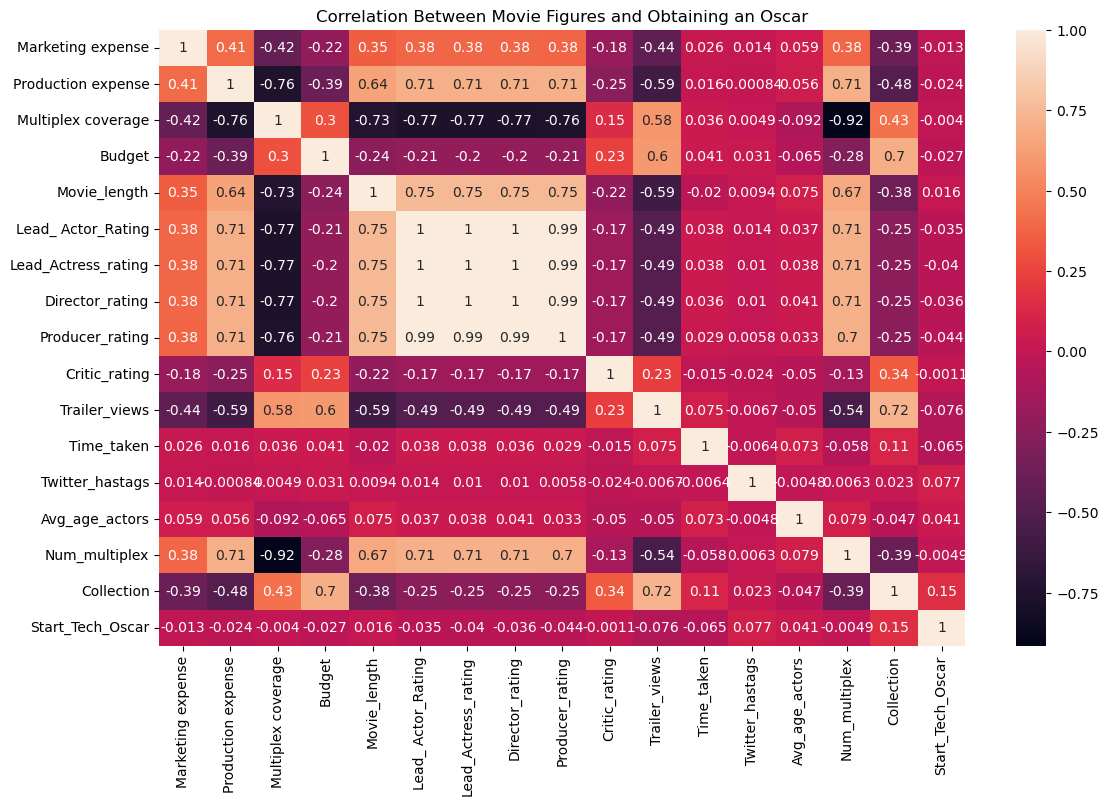

In [9]:
plt.figure(figsize= (13,8))
sns.heatmap(corr,annot=True)
plt.title('Correlation Between Movie Figures and Obtaining an Oscar')
plt.show()

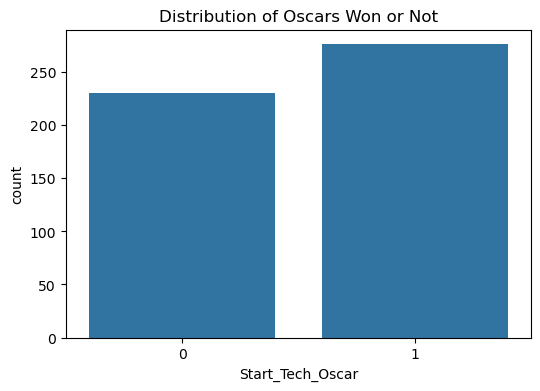

In [10]:
#Plot the distribution of the target variable for classification and Regression
plt.figure(figsize= (6,4))
sns.countplot(x='Start_Tech_Oscar',data=data)
plt.title('Distribution of Oscars Won or Not')
plt.show()

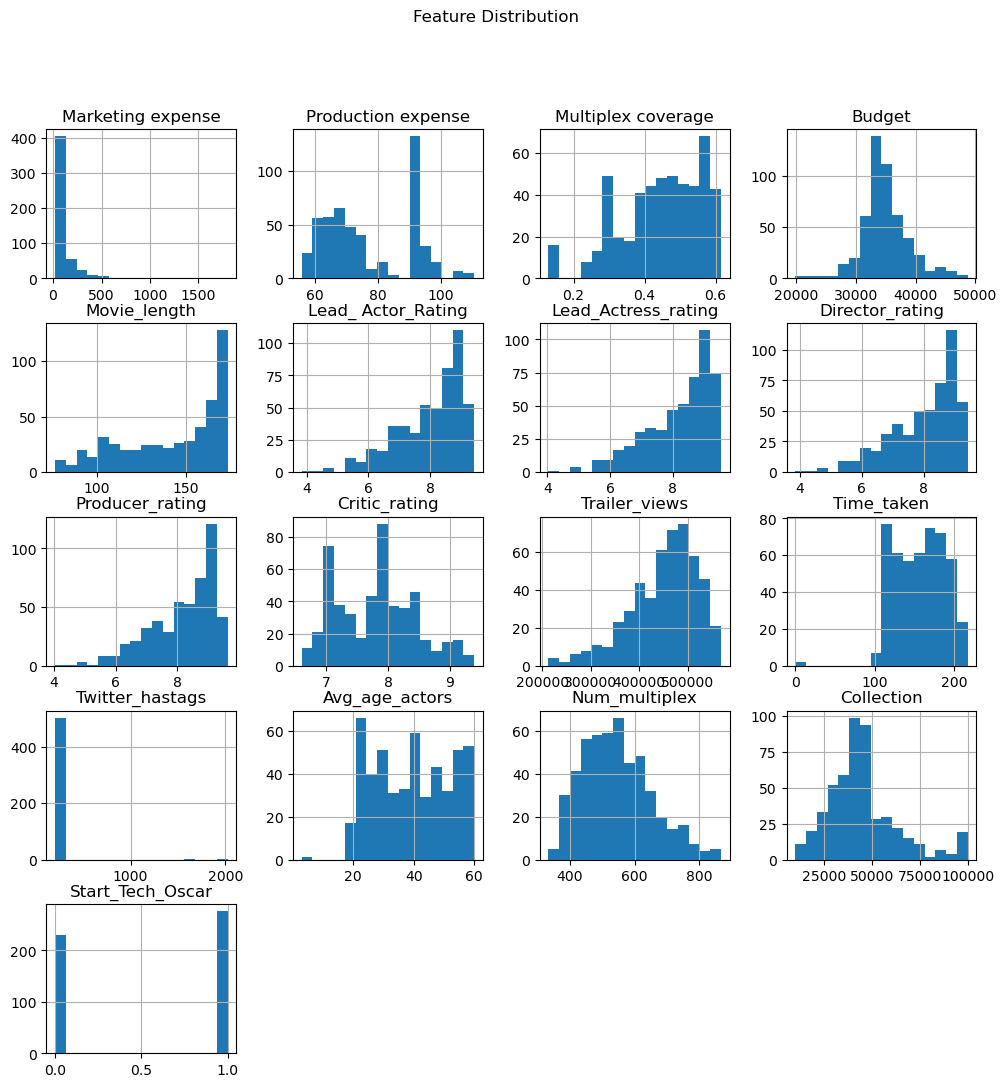

In [11]:
#Feature distribution
data.hist(figsize=(12,12),bins=16)
plt.suptitle('Feature Distribution')
plt.show()

In [12]:
#Imputing the mean of 'Time_taken' for the column's missing values. 
dictionary = {
    'Time_taken':data['Time_taken'].mean()
}
#We chose mean based off of the feature distribution 

In [13]:
data2 = data.fillna(value=dictionary)
data2.isnull().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
Start_Tech_Oscar       0
dtype: int64

In [14]:
data['Genre'].unique()

array(['Thriller', 'Drama', 'Comedy', 'Action'], dtype=object)

In [15]:
# Using pd.get_dummies to encode all categorical variables as True/False
X_encoded = pd.get_dummies(data2, columns= ['Genre','3D_available'], drop_first = False)

X_encoded.head() #True=1, False=0

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_NO,3D_available_YES
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,23,494,48000,1,False,False,False,True,False,True
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,42,462,43200,0,False,False,True,False,True,False
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,38,458,69400,1,False,True,False,False,True,False
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,45,472,66800,1,False,False,True,False,False,True
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,55,395,72400,1,False,False,True,False,True,False


In [16]:
data.columns

Index(['Marketing expense', 'Production expense', 'Multiplex coverage',
       'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating',
       'Director_rating', 'Producer_rating', 'Critic_rating', 'Trailer_views',
       '3D_available', 'Time_taken', 'Twitter_hastags', 'Genre',
       'Avg_age_actors', 'Num_multiplex', 'Collection', 'Start_Tech_Oscar'],
      dtype='object')

## Linear Regression Model

In [17]:
X= X_encoded.drop(columns=['Collection'], axis=1)
y= X_encoded['Collection']
# Initializing and traing the model
# Reserve the first five rows for comparison
X_validation = X.iloc[:5]
y_validation = y.iloc[:5]

# Use the rest of the data for training and testing
X_remaining = X.iloc[5:]
y_remaining = y.iloc[5:]

# Train-test split on the data
X_train, X_test, y_train, y_test = train_test_split(X_remaining, y_remaining, test_size=0.20, random_state=5)

mlr_model = LinearRegression()
mlr_model.fit(X_train.values, y_train.values)

#Predicting on the reserved data to validate the model
y_pred_validation = mlr_model.predict(X_validation.values)
# Predicting on test set
y_pred_mlr = mlr_model.predict(X_test.values)

mse = mean_squared_error(y_test, y_pred_mlr)
rmse = np.sqrt(mse)
R2=r2_score(y_test, y_pred_mlr)
# Printing statistical scores
print("Mean Squared Error",mse)
print("Root Mean Squared Error", rmse)
print("R2 Score",R2)


Mean Squared Error 57843628.916175
Root Mean Squared Error 7605.499912311813
R2 Score 0.8239572515841679


In [18]:
#Table to display the actual and predicted values side by side
print("Reserved Rows Comparison:")
Comparison = pd.DataFrame({
    'Actual': y_validation.values,
    'Predicted': y_pred_validation
})
print(Comparison)

Reserved Rows Comparison:
   Actual     Predicted
0   48000  61015.855871
1   43200  43256.691388
2   69400  59184.368582
3   66800  66543.515119
4   72400  65584.715546


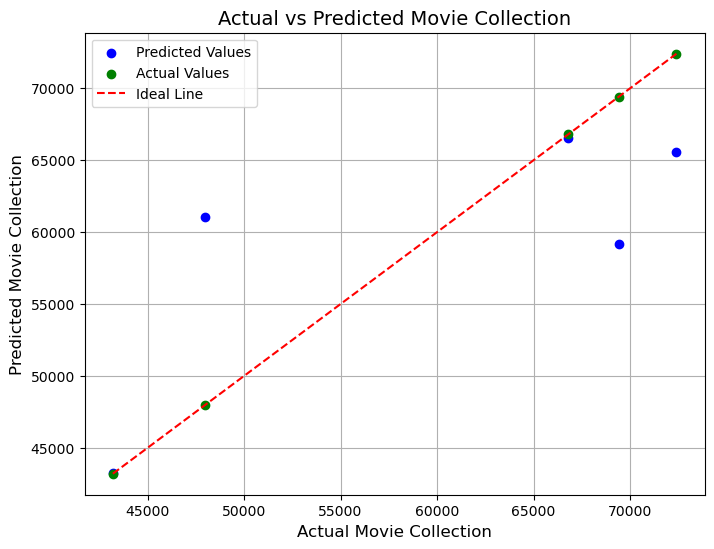

In [19]:
#Scatter plot to visualize the percision of the predictions
actual = list(y_validation.values)
predicted = list(y_pred_validation)
 
plt.figure(figsize=(8, 6))
plt.scatter(actual, predicted, color='blue', label='Predicted Values')
plt.scatter(actual, actual, color='green', label='Actual Values')
plt.plot([min(actual), max(actual)], [min(actual), max(actual)], color='red', linestyle='--', label='Ideal Line')

plt.xlabel('Actual Movie Collection', fontsize=12)
plt.ylabel('Predicted Movie Collection', fontsize=12)
plt.title('Actual vs Predicted Movie Collection', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


## Logistic Regression Model

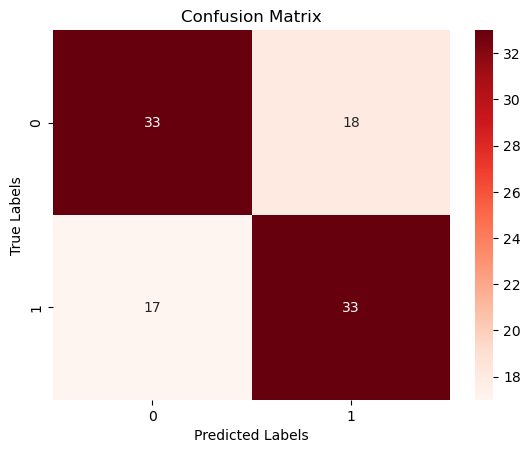

Classification Report:

              precision    recall  f1-score   support

           0       0.66      0.65      0.65        51
           1       0.65      0.66      0.65        50

    accuracy                           0.65       101
   macro avg       0.65      0.65      0.65       101
weighted avg       0.65      0.65      0.65       101



In [20]:
# Declaring the data for logistic regression
X2 = X_encoded.drop(columns=['Start_Tech_Oscar','Lead_ Actor_Rating', 
             'Lead_Actress_rating', 'Director_rating', 'Producer_rating'], axis=1)
y2 = X_encoded['Start_Tech_Oscar']

# Reserve the first five rows for comparison
X2_validation = X2.iloc[:5]
y2_validation = y2.iloc[:5]

# Use the rest of the data for training and testing
X2_remaining = X2.iloc[5:]
y2_remaining = y2.iloc[5:]

# Train-test split on the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_remaining, y2_remaining, test_size=0.20, random_state=61)

# Initialize the logistic regression model
LogModel = LogisticRegression(max_iter=1750)

# Train the model on the training data
LogModel.fit(X2_train.values, y2_train.values)

# Predictions on the test data
y2_pred = LogModel.predict(X2_test.values)

#Validating 
y2_pred_validation = LogModel.predict(X2_validation.values)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y2_test, y2_pred)

# Plot confusion matrix on a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Reds')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y2_test, y2_pred))


In [21]:
#DataFrame for comparing validation data and predicted values
print("Reserved Rows Comparison:")
Comparison2 = pd.DataFrame({
    "Actual": y2_validation.values,
    "Predicted": y2_pred_validation
})
print(Comparison2)

Reserved Rows Comparison:
   Actual  Predicted
0       1          0
1       0          0
2       1          1
3       1          1
4       1          1


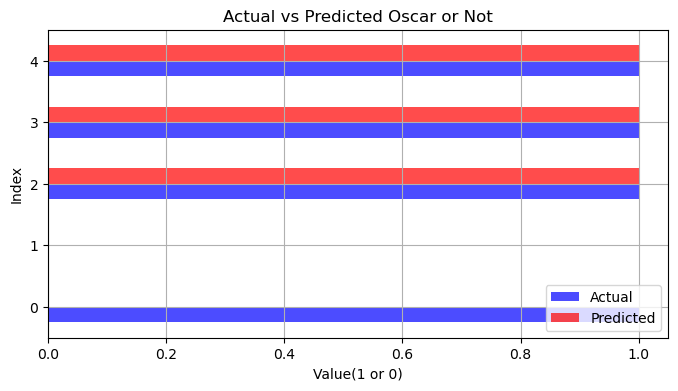

In [22]:
# 'Step Plot' for side by side of actual and predicted Oscar status for the validation data
Comparison2.plot(kind='barh', figsize=(8, 4), color=['blue', 'red'], alpha=0.7)
plt.title("Actual vs Predicted Oscar or Not")
plt.xlabel("Value(1 or 0)")
plt.ylabel("Index")
plt.legend(["Actual", "Predicted"], loc='lower right')
plt.grid(True)
plt.show()
# 4 of 5 accuratly predicted

## Conclusions

Overall, the two models made adequate predictions. For movie collection, r2 of .82 demonstrates 82% of earnings being explained by the parameters in the model. For whether a movie wins an Oscar or not, both classes achieved an F1-score of 0.65, reflecting a consistent balance between precision and recall. Furthermore, the precison for the two classes were balanced; 0.66 for predicting "No Oscar" (class 0) and 0.65 for predicting "Oscar" (class 1). One aspect of the data that we predict may conribute to lowering the statistical scores is the number of rows in the data. With more data to train, the more accurate the model will become at predicting the target variables. 